# 📘 Evaluation Metrics

在训练机器学习模型之后，选择合适的评估指标对于判断模型性能、指导模型改进至关重要。不同任务（分类 vs 回归）、不同数据分布（是否不平衡）、不同模型目标（精确 vs 召回）都会影响评估方式的选择。

---

## ✳️ 分类 vs 回归指标概览

| 分类指标举例                 | 回归指标举例                       |
|-----------------------------|------------------------------------|
| Accuracy / Precision / F1   | R² / Adjusted R²/  |
| ROC-AUC / PR-AUC            | （loss: MSE, MAE 另见 Loss 部分）   |
| Confusion Matrix            |                                     |
| 多分类：Macro / Micro F1    |                                     |

---

## 📊 Confusion Matrix 是核心

大多数分类指标都可从混淆矩阵推导：

|                 | 预测为正类 | 预测为负类 |
|-----------------|------------|------------|
| 实际为正类 (P)    | TP         | FN         |
| 实际为负类 (N)    | FP         | TN         |

- TP：真正例（预测为正且实际为正）
- FP：假正例（预测为正但实际为负）
- FN：假负例（预测为负但实际为正）
- TN：真负例（预测为负且实际为负）

---

## 📈 分类评估指标的核心维度

| 维度           | 常见指标                 | 解释                                    |
|----------------|--------------------------|-----------------------------------------|
| 整体正确率     | Accuracy                 | 预测正确的比例（适用于均衡数据）         |
| 正类识别能力   | Precision / Recall       | 精确度 = 有多少预测正类是对的；召回率 = 找出多少正类 |
| 平衡评估       | F1-score                 | Precision 与 Recall 的调和平均           |
| 曲线评估       | ROC-AUC / PR-AUC         | 不依赖阈值，评估模型在不同阈值下的整体表现 |
| 多类别扩展     | Macro / Micro / Balanced | 处理类别不均衡或多分类问题               |

---

## 🎯 面试常见问题

1. **什么时候不用 Accuracy？**  
   在类别极度不平衡（如正负样本 1:1000）时，Accuracy 可能非常高但无实际意义。

2. **Precision 和 Recall 有什么取舍？**  
   Precision 高说明预测更“谨慎”，Recall 高说明正类更“不遗漏”；F1 是它们的权衡。

3. **AUC 和 Accuracy 有何本质区别？**  
   Accuracy 是某一阈值下的结果，AUC 是所有可能阈值下的综合评估（模型能力的总体曲线）。

4. **Macro vs Micro F1 有什么区别？**  
   Macro 对每个类别平均，Micro 对所有样本统一计算；前者适合关注小类别。

5. **为什么 R² 可为负？**  
   当模型预测效果还不如用均值预测时，R² 可能小于 0，表示完全不拟合。


## 📦 Confusion Matrix（混淆矩阵）

### 🧭 介绍
混淆矩阵（Confusion Matrix）是分类模型最基础的性能评估工具，展示模型在正负类上的预测效果，几乎所有分类指标（如 Precision、Recall、F1）都由它推导而来。

---

### 🧱 矩阵结构（以二分类为例）

|                 | **预测为正类** | **预测为负类** |
|-----------------|----------------|----------------|
| **实际为正类**     | TP（真正例）       | FN（假负例）       |
| **实际为负类**     | FP（假正例）       | TN（真负例）       |

- **TP**：预测为正且实际为正
- **FP**：预测为正但实际为负
- **FN**：预测为负但实际为正
- **TN**：预测为负且实际为负

---

### 📌 如何理解？

- 一个好的模型应该有 **TP 和 TN 多，FP 和 FN 少**
- 偏向于正类或负类，会导致 FP 或 FN 偏大
- 混淆矩阵是理解 Precision、Recall、F1-score 的关键基础

---

### 🎯 面试常见问题（含简答）

1. **Confusion Matrix 和 Accuracy 的关系？**  
   Accuracy = (TP + TN) / 所有样本数，是混淆矩阵的总体正确率。

2. **如何从 Confusion Matrix 计算 Precision？**  
   Precision = TP / (TP + FP)，即“被判为正类中真正为正的比例”。

3. **Recall 是什么？和 FN 有关吗？**  
   Recall = TP / (TP + FN)，即“实际为正类中被成功预测的比例”。

4. **什么时候 FP 比 FN 更重要？**  
   如垃圾邮件检测中，正常邮件误判为垃圾（FP）是更严重的错误。

5. **什么时候 FN 比 FP 更重要？**  
   如癌症检测中，漏掉一个患癌患者（FN）后果更严重。



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# 生成一个二分类数据集
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 拟合模型
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

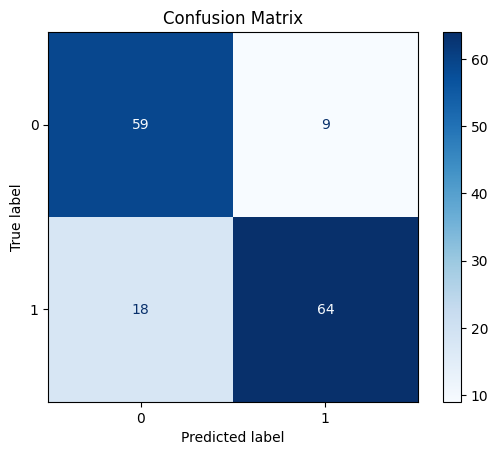

In [4]:
# sklearn 示例：混淆矩阵计算 + 热力图可视化
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 混淆矩阵计算
cm = confusion_matrix(y_test, y_pred)

# 可视化
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


## 📦 分类核心指标（Accuracy / Precision / Recall / F1 / Specificity）

这些指标都是从 Confusion Matrix 派生出来的，能从不同角度衡量分类模型的表现，尤其是在类别不平衡场景下需要权衡使用。

---

### 📐 公式定义（基于 TP, FP, FN, TN）

| 指标         | 公式                                     | 含义                                   |
|--------------|------------------------------------------|----------------------------------------|
| Accuracy     | $(TP + TN) / (TP + FP + FN + TN)$         | 模型整体预测正确的比例                 |
| Precision    | $TP / (TP + FP)$                         | 被判为正类中，实际为正的比例           |
| Recall       | $TP / (TP + FN)$                         | 实际为正类中，被成功识别的比例         |
| Specificity  | $TN / (TN + FP)$                         | 实际为负类中，被成功识别为负的比例     |
| F1-score     | $2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$ | Precision 和 Recall 的调和平均 |

---

### 🎯 指标使用建议

| 场景                                   | 推荐指标         | 原因说明                            |
|----------------------------------------|------------------|-------------------------------------|
| 类别平衡、对正负类同等重视              | Accuracy          | 简单直观                            |
| 更关注正类的预测是否可靠（如医学诊断）     | Precision          | FP 代价高                           |
| 更关注正类是否都被识别（如疾病筛查）       | Recall             | FN 代价高                           |
| 综合考虑 Precision 和 Recall           | F1-score           | 两者权衡适用                        |
| 关注负类识别能力（如正常 vs 异常）        | Specificity        | TN 为关键                           |

---

### 🎯 面试常见问题（含简答）

1. **Precision 和 Recall 哪个更重要？**  
   取决于应用。Precision 强调“可信度”，Recall 强调“覆盖率”。

2. **F1-score 是什么？为什么使用它？**  
   它是 Precision 和 Recall 的调和平均，用于在两者都重要时做折中。

3. **为什么 Accuracy 不适合用于不平衡数据？**  
   因为它可能被多数类主导，比如 95% 的负类全预测对，Accuracy = 95%，但模型没学到正类。

4. **如何理解 Specificity？**  
   它是负类的 Recall，衡量负类被正确识别的比例，常用于二分类诊断类问题。

5. **是否 Precision 高就代表模型更好？**  
   不一定，Precision 高但 Recall 低说明模型“保守”，漏掉很多正类。


In [6]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# 已有模型输出：y_test, y_pred（使用上一个 LogisticRegression）

# 计算基础指标
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 从混淆矩阵提取 Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
spec = tn / (tn + fp)

# 打印所有指标
print(f"Accuracy     : {acc:.3f}")
print(f"Precision    : {prec:.3f}")
print(f"Recall       : {rec:.3f}")
print(f"F1-score     : {f1:.3f}")
print(f"Specificity  : {spec:.3f}")


Accuracy     : 0.820
Precision    : 0.877
Recall       : 0.780
F1-score     : 0.826
Specificity  : 0.868


In [7]:
#不使用sklearn 手撕版本

import numpy as np

def compute_metrics_manual(y_true, y_pred):
    """
    手撕版本计算 Accuracy, Precision, Recall, F1, Specificity
    参数:
        y_true: 实际标签，0 或 1
        y_pred: 预测标签，0 或 1
    返回:
        字典，包含所有指标
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    TN = np.sum((y_pred == 0) & (y_true == 0))

    accuracy = (TP + TN) / (TP + FP + FN + TN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "Specificity": specificity
    }

# 示例使用
metrics = compute_metrics_manual(y_test, y_pred)
for k, v in metrics.items():
    print(f"{k:12}: {v:.3f}")


Accuracy    : 0.820
Precision   : 0.877
Recall      : 0.780
F1-score    : 0.826
Specificity : 0.868


## 📦 ROC 曲线 & Precision-Recall 曲线（含 AUC）

### 🧭 介绍
在概率型分类器中（如逻辑回归、树模型），输出的是正类概率而非直接标签。此时通过**改变阈值**可以得到不同的分类效果，ROC 曲线和 PR 曲线用于分析模型在不同阈值下的整体表现。

---

### 📐 定义与区别

| 曲线类型         | 横轴              | 纵轴                | 特点与用途                             |
|------------------|-------------------|---------------------|----------------------------------------|
| ROC 曲线          | FPR（假正率）      | TPR（真正率 = Recall） | 衡量正负类总体区分能力，偏向均衡数据         |
| PR 曲线           | Recall（召回率）   | Precision（精确率）   | 更适合不平衡数据，强调正类预测质量             |

- **AUC**：曲线下的面积（Area Under Curve）
    - ROC-AUC 值越接近 1，模型越优秀
    - PR-AUC 更关注正类召回-精确的综合能力

---

### 🎯 使用建议

| 场景                      | 推荐曲线         |
|---------------------------|------------------|
| 类别基本均衡                | ROC Curve        |
| 正负类别极不均衡（如欺诈检测） | PR Curve         |

---

### 🎯 面试常见问题（含简答）

1. **ROC 曲线和 PR 曲线的核心区别？**  
   ROC 衡量正负类整体可分性，PR 更关注正类预测表现（精确 + 覆盖）。

2. **什么时候使用 PR 曲线比 ROC 更好？**  
   当正类很少（如诈骗检测、疾病筛查）时，ROC 易被负类主导，应用 PR。

3. **AUC 接近 0.5 是什么情况？**  
   表示模型没有区分能力，相当于随机猜测。

4. **AUC 能反映实际阈值下的表现吗？**  
   不能。它是所有可能阈值下的整体能力，需要结合具体阈值使用指标如 F1。

5. **为什么 PR 曲线更难“看起来好”？**  
   因为 Precision 通常下降很快，特别在 Recall 较高时，很容易下滑。



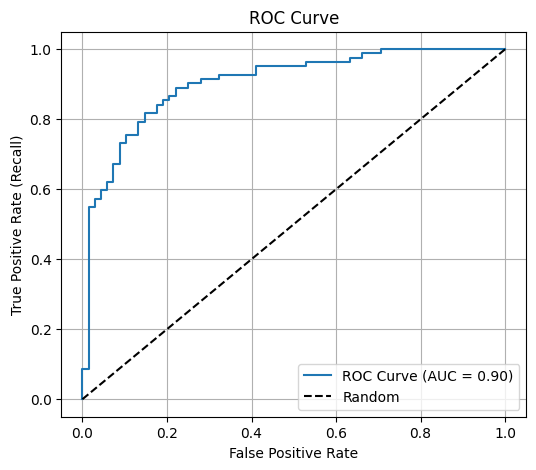

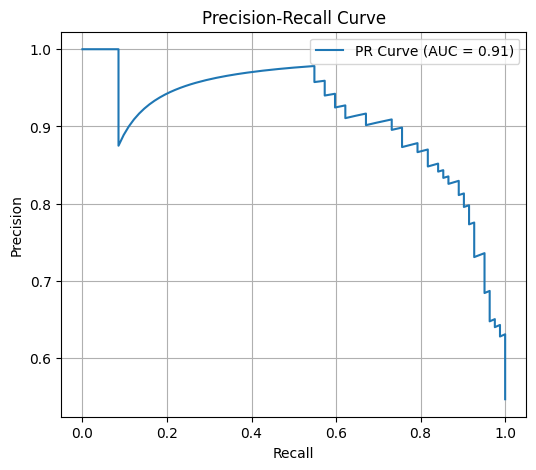

In [9]:
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)

# 模型输出概率（而不是标签）
y_proba = clf.predict_proba(X_test)[:, 1]

# ROC 曲线与 AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall 曲线与 AUC
prec, rec, _ = precision_recall_curve(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


## 📦 多分类与多标签扩展指标

在多分类任务中，传统二分类指标（Precision、Recall、F1）需要通过聚合方式扩展。常见策略包括 **Macro / Micro / Weighted**。对于多标签任务，还引入了 **Hamming Loss** 等新指标。

---

### 📐 一、Macro / Micro / Weighted Averaging

| 类型       | 计算方法说明                                                                 | 适合场景                  |
|------------|------------------------------------------------------------------------------|---------------------------|
| Macro      | 对每个类别分别计算指标，然后取平均                                           | 类别均等关注               |
| Micro      | 将所有样本统一看待，汇总 TP/FP/FN 后计算                                      | 样本权重相等，偏向大类     |
| Weighted   | 类似 Macro，但每类按支持度加权（样本数多的类权重大）                          | 同时考虑类别分布与表现     |

---

### 📐 二、Top-K Accuracy（常用于图像/推荐）

- 判断预测结果的前 $k$ 个中是否包含真实标签
- 例如图像分类中 Top-5 Accuracy = 模型前5个预测中是否含真值

---

### 📐 三、Hamming Loss（多标签专用）

- 衡量标签预测的**错误率**，即“预测错误标签数 / 总标签数”
- 越小越好，范围 [0, 1]

$$
\text{Hamming Loss} = \frac{1}{n_{\text{samples}} \cdot n_{\text{labels}}} \sum_{i=1}^{n} \text{xor}(y_i, \hat{y}_i)
$$

---

### 🎯 面试常见问题（含简答）

1. **Macro F1 和 Micro F1 的主要区别？**  
   Macro 是类别平均，Micro 是样本级总和，前者强调小类，后者偏向大类。

2. **什么时候使用 Weighted F1？**  
   当类别分布极度不平衡，但你仍希望综合考虑表现时。

3. **Top-K Accuracy 应用于哪些任务？**  
   图像分类（如 ImageNet）、推荐系统等多类输出场景。

4. **Hamming Loss 为什么适合多标签？**  
   因为它考虑每个标签是否独立预测正确，支持多标签向量比较。

5. **多分类 Precision 和 Recall 如何扩展？**  
   需要指定 `average='macro'`, `'micro'`, `'weighted'` 等策略。



In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, top_k_accuracy_score
from sklearn.preprocessing import label_binarize

# 使用 Iris 数据集（3类多分类）
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 训练多分类模型
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# 打印多分类报告（包含 macro/micro/weighted）
print(classification_report(y_test, y_pred, digits=3))

# Top-K Accuracy 示例（Top-2 是否命中真实标签）
topk_acc = top_k_accuracy_score(y_test, y_proba, k=2)
print(f"Top-2 Accuracy: {topk_acc:.3f}")


              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      1.000     1.000     1.000        11
           2      1.000     1.000     1.000        12

    accuracy                          1.000        38
   macro avg      1.000     1.000     1.000        38
weighted avg      1.000     1.000     1.000        38

Top-2 Accuracy: 1.000


## 📦 回归模型评估指标（非损失函数）

回归任务中，我们不再用 Precision / Recall，而是使用反映预测拟合程度的指标来评估模型性能。这些指标衡量的是模型输出与实际值的接近程度。

---

### 📐 1. R² Score（决定系数）

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
= 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- 取值范围通常在 $(-\infty, 1]$，越接近 1 表示模型拟合越好
- 如果模型连平均值都不如，$R^2 < 0$

---

### 📐 2. Adjusted R²（调整后的决定系数）

$$
\text{Adjusted } R^2 = 1 - \left(1 - R^2\right) \cdot \frac{n - 1}{n - p - 1}
$$

- $n$ 为样本数，$p$ 为特征数
- 惩罚模型复杂度，防止加入无用特征后 $R^2$ 虚高

---

### 📐 3. Explained Variance Score（解释方差）

$$
\text{EVS} = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}
$$

- 衡量模型解释数据变异程度
- 与 R² 相似，但更关注方差层面而非残差平方和

---

### 🎯 面试常见问题（含简答）

1. **R² 值为负说明什么？**  
   模型拟合还不如直接用均值预测（残差太大）。

2. **R² 和 Adjusted R² 的区别？**  
   Adjusted R² 考虑特征数，惩罚过多无用特征，防止虚高。

3. **什么时候使用 Explained Variance 而非 R²？**  
   当更关注预测结果是否捕捉数据波动性而非精确值时。

4. **模型拟合得很好，R² 但仍 < 1，是为什么？**  
   存在噪声、数据不可解释成完全线性趋势、欠拟合等都可能导致 R² < 1。

5. **R² 能单独用于模型好坏评估吗？**  
   不能。它不考虑过拟合、特征数等问题，需结合验证集/交叉验证等使用。


In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score
import numpy as np

# 生成带噪声的回归数据
X, y = make_regression(n_samples=100, n_features=3, noise=15, random_state=42)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# R²
r2 = r2_score(y, y_pred)

# Adjusted R²
n = X.shape[0]
p = X.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Explained Variance Score
evs = explained_variance_score(y, y_pred)

# 输出结果
print(f"R² Score               : {r2:.3f}")
print(f"Adjusted R² Score      : {adj_r2:.3f}")
print(f"Explained Variance     : {evs:.3f}")


R² Score               : 0.968
Adjusted R² Score      : 0.967
Explained Variance     : 0.968
